In [55]:
# Adapted from
#  https://github.com/salvadorgarciamunoz/kipet/blob/master/kipet/new_examples/Ex_12_multiple_experiments_concentration.py
#

In [56]:
from kipet import KipetModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
kipet_model = KipetModel()

r1 = kipet_model.new_reaction('reaction1')

r1.add_parameter('k1',init = 0.1, bounds = (0.0, 10.0))
r1.add_parameter('k2',init = 0.1, bounds = (0.0, 10.0))

r1.add_component('A', state = 'concentration', init = 1.0)
r1.add_component('B', state = 'concentration', init = 2.0)
r1.add_component('C', state = 'concentration', init = 0.0)
r1.add_component('D', state = 'concentration', init = 0.0)

In [58]:
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']*m.Z[t,'B']
    exprs['B'] = -m.P['k1']*m.Z[t,'A']*m.Z[t,'B']-m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    exprs['C'] = m.P['k1']*m.Z[t,'A']*m.Z[t,'B']-m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    exprs['D'] = m.P['k2']*m.Z[t,'B']*m.Z[t,'C']
    return exprs

r1.add_equations(rule_odes)

In [59]:
my_data_dir = '/home/paperspace/learn_kipet/my_data_sets/'
r1.add_dataset('C_data_1', category='concentration', file=my_data_dir + 'ABCD_cb0_2.csv')
r1.set_times(0.0, 4.0)
r1.variances = {'A':1, 'B':1, 'C':1, 'D':1}

In [60]:
r2 = kipet_model.new_reaction(name='reaction_2', model_to_clone=r1, items_not_copied='datasets')
r2.add_dataset('C_data_2', category='concentration', file=my_data_dir + 'ABCD_cb0_1.csv')
r2.components['A'].init = 1.0
r2.components['B'].init = 1.0
r2.set_times(0.0, 7.0)
r2.variances = {'A':1, 'B':1, 'C':1, 'D':1}

In [61]:
r1.settings.solver.linear_solver = 'ma27'
r2.settings.solver.linear_solver = 'ma27'
kipet_model.settings.solver.linear_solver = 'ma27'

In [62]:
kipet_model.run_opt()

times are: <class 'tuple'>
Warning! Since Cm-matrix contains negative values Kipet is assuming a derivative of Cm has been inputted
times are: <class 'tuple'>
times are: <class 'tuple'>
0.0 4.0
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyo

Ipopt 3.12: nlp_scaling_method=gradient-based
linear_solver=ma27


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:     6004
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      952

Total number of variables............................:     1206
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraint

In [63]:
for model, results in kipet_model.results.items():
     results.show_parameters


The estimated parameters are:
k1 1.0223979403762462
k2 1.9601640233570587

The estimated parameters are:
k1 1.0223979403762462
k2 1.9601640233570587


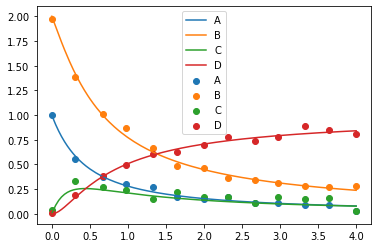

In [64]:
rxn = 'reaction1'
fig, ax = plt.subplots()
for c in ['A', 'B', 'C', 'D']:
    res = kipet_model.results[rxn]
    ax.plot(res.Z.index, res.Z[c], label = c)
    ax.scatter(r1.datasets['C_data_1'].data.index, r1.datasets['C_data_1'].data[c], label = c)
ax.legend()

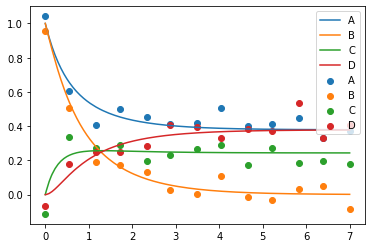

In [65]:
rxn = 'reaction_2'
fig, ax = plt.subplots()
for c in ['A', 'B', 'C', 'D']:
    res = kipet_model.results[rxn]
    ax.plot(res.Z.index, res.Z[c], label = c)
    ax.scatter(r2.datasets['C_data_2'].data.index, r2.datasets['C_data_2'].data[c], label = c)
ax.legend()